# NORMAL EQUATION: THE CLOSED-FORM SOLUTION

UNLIKE GRADIENT DESCENT, WHICH IS AN ITERATIVE OPTIMIZATION ALGORITHM THAT STEPS TOWARDS THE MINIMUM, THE **NORMAL EQUATION** CALCULATES THE OPTIMAL PARAMETERS ANALYTICALLY IN A SINGLE STEP.

### THE MATHEMATICAL FORMULA
THE OPTIMAL WEIGHTS $\theta$ (THETA) THAT MINIMIZE THE COST FUNCTION $J(\theta)$ CAN BE CALCULATED DIRECTLY USING LINEAR ALGEBRA:

$$\theta = (X^T X)^{-1} X^T y$$

### KEY DIFFERENCES FROM GRADIENT DESCENT
| FEATURE | GRADIENT DESCENT | NORMAL EQUATION |
| :--- | :--- | :--- |
| **TYPE** | ITERATIVE (APPROXIMATE) | ANALYTICAL (EXACT) |
| **LEARNING RATE** | REQUIRED ($\alpha$) | NOT REQUIRED |
| **ITERATIONS** | MANY REQUIRED | NONE (1 STEP) |
| **COMPLEXITY** | $O(kn^2)$ (GOOD FOR LARGE DATASETS) | $O(n^3)$ (SLOW FOR LARGE FEATURE SETS) |
| **FEATURE SCALING**| MANDATORY FOR SPEED | NOT STRICTLY NECESSARY |

### IMPLEMENTATION STRATEGY
1. **ADD BIAS TERM:** APPEND A COLUMN OF 1s TO THE FEATURE MATRIX $X$ TO HANDLE THE INTERCEPT ($\theta_0$).
2. **COMPUTE:** USE `NUMPY` FOR MATRIX MULTIPLICATION AND INVERSION.

## IMPORT LIBRARIES

In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOAD DATA

In [18]:
# READING DATA FROM CSV FILES
df_x = pd.read_csv('DATA/linearX.csv')
df_y = pd.read_csv('DATA/linearY.csv')

In [3]:
# CONVERTING TO NUMPY ARRAYS

X_raw = df_x.values.flatten()
y = df_y.values.flatten()

## DATA PREPROCESSING

> `NOTE:` 
>
> NORMAL EQUATION DOESN'T STRICTLY NEED THIS, BUT WE KEEP IT FOR FAIR COMPARISON

In [4]:
# PREPROCESSING: Z-SCORE NORMALIZATION (STANDARDIZATION)
# FORMULA: Z = (X - MEAN) / STD_DEV
# THIS HELPS GRADIENT DESCENT CONVERGE FASTER

# CALCULATING MEAN AND STANDARD DEVIATION 

mean_x = np.sum(X_raw) / len(X_raw)
std_x = np.sqrt(np.sum((X_raw - mean_x)**2) / len(X_raw))

# APPLYING NORMALIZATION
X = (X_raw - mean_x) / std_x

## LINEAR REGRESSION — NORMAL EQUATION EXPLANATION

---

## ORIGINAL LINEAR MODEL (SCALAR FORM)

IN SIMPLE LINEAR REGRESSION, THE MODEL FOR A SINGLE INSTANCE IS DEFINED AS:

$$y = \theta_0 + \theta_1 x$$

WHERE:
* $\theta_0$ : **INTERCEPT (BIAS)**
* $\theta_1$ : **SLOPE (WEIGHT)**
* $x$ : **INPUT FEATURE**
* $y$ : **PREDICTED OUTPUT**

---

## PROBLEM WITH THE SCALAR FORM

> THE SCALAR FORM IS COMPUTATIONALLY INEFFICIENT BECAUSE:
> * IT IS DIFFICULT TO SCALE TO **MULTIPLE FEATURES** ($x_1, x_2, ..., x_n$)
> * IT PREVENTS THE USE OF HIGH-PERFORMANCE **MATRIX ALGEBRA**
> * IT CANNOT BE SOLVED DIRECTLY VIA THE **NORMAL EQUATION**

---

## THE DESIGN MATRIX ($X_b$)

WE INTRODUCE A **BIAS FEATURE** ($x_0 = 1$) BY PREPENDING A COLUMN OF ONES TO OUR FEATURE MATRIX. THIS TRANSFORMS OUR DATA INTO THE **DESIGN MATRIX**:

$$X_b = \begin{bmatrix} 1 & x^{(1)} \\ 1 & x^{(2)} \\ \vdots & \vdots \\ 1 & x^{(m)} \end{bmatrix}$$

**NUMPY IMPLEMENTATION:**
`X_b = np.c_[np.ones((m, 1)), X]`

---

## PARAMETER VECTOR ($\theta$)

BY INCORPORATING THE BIAS INTO THE MATRIX, WE CAN STACK ALL PARAMETERS INTO A SINGLE COLUMN VECTOR:

$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$$

---

## VECTORIZED LINEAR MODEL

NOW, THE ENTIRE SET OF PREDICTIONS FOR ALL $m$ EXAMPLES IS REDUCED TO A SINGLE MATRIX MULTIPLICATION:

$$\hat{y} = X_b \cdot \theta$$



---

## THE NORMAL EQUATION (CLOSED-FORM SOLUTION)

THE **NORMAL EQUATION** IS THE ANALYTICAL SOLUTION THAT FINDS THE VALUE OF $\theta$ THAT MINIMIZES THE COST FUNCTION WITHOUT REQUIRING GRADIENT DESCENT:

$$\theta = (X_b^T X_b)^{-1} X_b^T y$$

### MATRIX COMPONENT BREAKDOWN

| COMPONENT | MATHEMATICAL OPERATION |
| :--- | :--- |
| $X_b^T$ | **TRANSPOSE** OF THE DESIGN MATRIX |
| $(X_b^T X_b)^{-1}$ | **MATRIX INVERSE** OF THE COVARIANCE-LIKE MATRIX |
| $y$ | **TARGET VECTOR** (ACTUAL LABELS) |

---

## KEY ADVANTAGES OF THIS APPROACH

* **UNIFICATION:** THE INTERCEPT $\theta_0$ IS TREATED EXACTLY LIKE OTHER WEIGHTS.
* **SPEED:** VECTORIZATION LEVERAGES **BLAS** LIBRARIES FOR PARALLEL COMPUTATION.
* **PRECISION:** PROVIDES THE EXACT MATHEMATICAL MINIMUM IN A SINGLE CALCULATION.

---

## FINAL SUMMARY

> $$\hat{y} = X_b \theta \implies \theta = (X_b^T X_b)^{-1} X_b^T y$$

## NORMAL EQUATION IMPLEMENTATION

In [14]:
# --- ADDING BIAS TERM (COLUMN OF ONES: X0 = 1) TO X ---
# X MATRIX SHAPE BECOMES (m, 2)
# X_b = [1, x_1
#        1, x_2
#        ...
#        1, x_m]

# THE FORMULA REQUIRES X TO BE A DESIGN MATRIX [1, x1, x2...]

m = len(y)

# ADD x0 = 1 TO EACH INSTANCE
X_b = np.c_[np.ones((m, 1)), X]

# CALCULATING THETA USING NORMAL EQUATION
# FORMULA: theta = inv(X.T @ X) @ X.T @ y

# COMPUTE X TRANSPOSE DOT X
X_T_X = X_b.T.dot(X_b)

# COMPUTE INVERSE OF (X_T_X)
# WE USE pseudo-inverse (pinv) FOR STABILITY IF MATRIX IS SINGULAR
inv_X_T_X = np.linalg.pinv(X_T_X)

# COMPUTE X TRANSPOSE DOT Y
X_T_y = X_b.T.dot(y)

# FINAL CALCULATION
theta = inv_X_T_X.dot(X_T_y)

# EXTRACTING PARAMETERS
b_norm = theta[0]
w_norm = theta[1]

# PREDICTION FUNCTION FOR NORMAL EQUATION
def predict_norm(X_input):
    return w_norm * X_input + b_norm

In [7]:
print("--- NORMAL EQUATION RESULTS ---")
print(f"INTERCEPT (BIAS) --> {b_norm:.6f}")
print(f"SLOPE (WEIGHT) -->   {w_norm:.6f}")

--- NORMAL EQUATION RESULTS ---
INTERCEPT (BIAS) --> 0.996634
SLOPE (WEIGHT) -->   0.001358


## VISUALIZATION

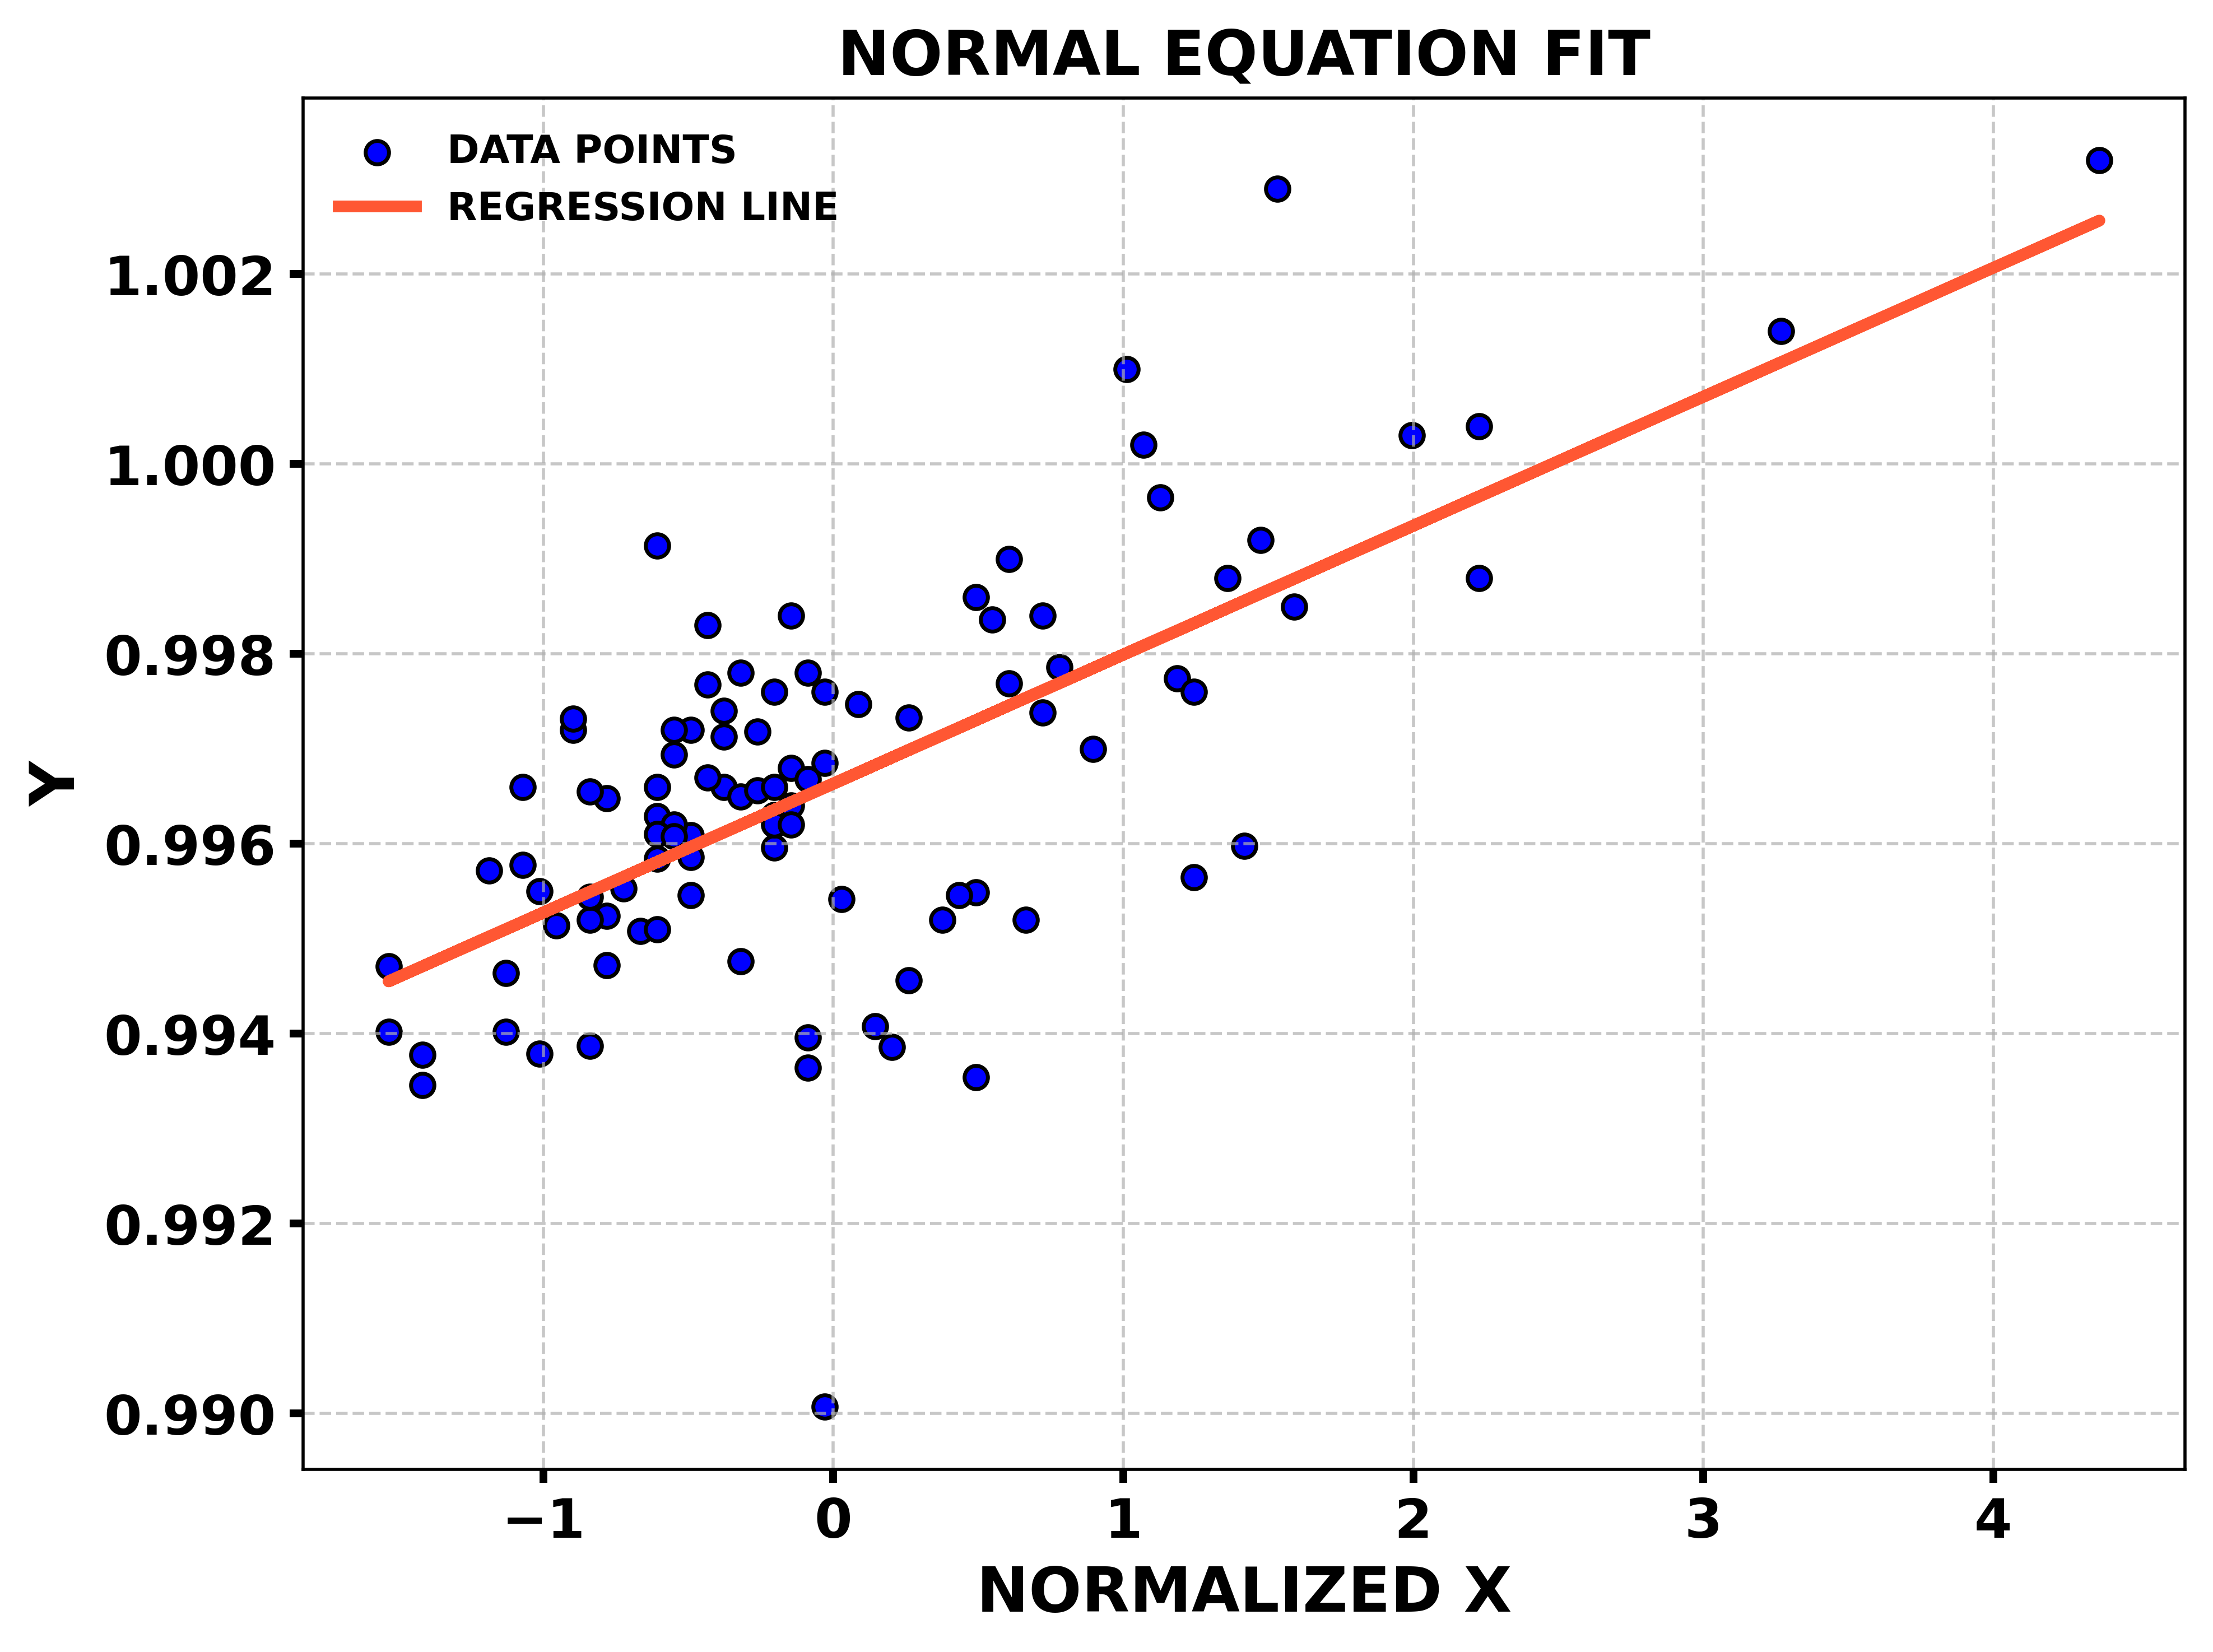

In [17]:
# VISUALIZING THE FIT
plt.figure(figsize=(8, 6), dpi=500)

# DATA AND NORMAL EQUATION LINE
plt.scatter(X, y, color="blue", edgecolor="black", label="DATA POINTS") 
plt.plot(X, predict_norm(X), color="#FF5733", linewidth=3, label="REGRESSION LINE") 
plt.title("NORMAL EQUATION FIT", fontsize=16, fontweight="bold")
plt.xlabel("NORMALIZED X", fontsize=16, fontweight="bold")
plt.ylabel("Y", fontsize=16, fontweight="bold")

plt.tick_params(axis="both", which="major", labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight("bold")

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={"weight": "bold"})

plt.tight_layout()
plt.show()

## COMPARISON: GD vs NORMAL EQ vs SKLEARN

LINEAR REGRESSION GRADIENT DESCENT

In [8]:
class LinearRegression:
    
    # INITIALIZING HYPERPARAMETERS
    def __init__(self, learning_rate = 0.5, iterations = 10):
        self.lr = learning_rate
        self.iterations = iterations
        
        self.w = 0.0
        self.b = 0.0
    
    # TRAINING USING GRADIENT DESCENT
    def train(self, X, y):
        m = len(y)
        
        # GRADIENT DESCENT LOOP
        for _ in range(self.iterations):
            
            pred = self.w * X + self.b
                
            # UPDATING PARAMETERS
            self.w -= self.lr * (1 / m) * np.sum((pred - y) * X)
            self.b -= self.lr * (1 / m) * np.sum(pred - y)
            
        return self.w, self.b
    
# INITIALIZING MODEL
model = LinearRegression(learning_rate = 0.5, iterations = 10)

# TRAINING USING BATCH GRADIENT DESCENT
w_gd, b_gd = model.train(X, y)    

SCIKIT LEARN

In [9]:
# IMPORT SCIKIT LEARN
from sklearn.linear_model import LinearRegression

# TRAINING SKLEARN MODEL
model_sk = LinearRegression()
model_sk.fit(X.reshape(-1, 1), y)

w_sk = model_sk.coef_[0]
b_sk = model_sk.intercept_

COMPARISON DATAFRAME

In [10]:
comparison_data = {
    'METHOD' : ['NORMAL EQUATION', 'GRADIENT DESCENT', 'SCIKIT-LEARN'],
    'WEIGHT' : [w_norm, w_gd, w_sk],
    'BIAS' : [b_norm, b_gd, b_sk]
}

df_comp = pd.DataFrame(comparison_data)

print("\n--- FINAL PARAMETER COMPARISON ---")
print(df_comp)


--- FINAL PARAMETER COMPARISON ---
             METHOD    WEIGHT      BIAS
0   NORMAL EQUATION  0.001358  0.996634
1  GRADIENT DESCENT  0.001357  0.995661
2      SCIKIT-LEARN  0.001358  0.996634


## 🔬 PARAMETER COMPARISON: ANALYTICAL VS ITERATIVE METHODS

> **OBJECTIVE:** ANALYZE AND INTERPRET THE LEARNED PARAMETERS FROM `NORMAL EQUATION`, `GRADIENT DESCENT`, AND `SCIKIT-LEARN`.

---

## 📐 WEIGHT (SLOPE) ANALYSIS
> ALL THREE METHODS LEARN **VIRTUALLY IDENTICAL WEIGHTS**.

- `NORMAL EQUATION  =  SCIKIT-LEARN`
- `GRADIENT DESCENT ≈  ANALYTICAL SOLUTIONS`

> THIS CONFIRMS:
- CORRECT **GRADIENT FORMULATION**
- PROPER **BATCH UPDATES**
- SUCCESSFUL CONVERGENCE TO THE **GLOBAL MINIMUM**

`→ THE LINEAR RELATIONSHIP (SLOPE) IS LEARNED CONSISTENTLY BY ALL METHODS.`

---

## 🎯 BIAS (INTERCEPT) ANALYSIS
> A **SLIGHT DEVIATION** IS OBSERVED IN THE BIAS TERM FOR GRADIENT DESCENT.

- `NORMAL EQUATION  =  SCIKIT-LEARN`
- `GRADIENT DESCENT < ANALYTICAL INTERCEPT`

> THIS OCCURS BECAUSE:
- GRADIENT DESCENT IS AN **ITERATIVE NUMERICAL METHOD**
- CONVERGENCE IS APPROXIMATE AND DEPENDS ON:
  - LEARNING RATE
  - NUMBER OF ITERATIONS
  - STOPPING CRITERIA
- THE MODEL STOPS **CLOSE TO**, BUT NOT EXACTLY AT, THE OPTIMUM

`→ THIS SMALL OFFSET DIRECTLY EXPLAINS THE CONSISTENT PREDICTION SHIFT OBSERVED EARLIER.`

---

## 🧠 METHOD-WISE INTERPRETATION
> **NORMAL EQUATION & SCIKIT-LEARN**

- PROVIDE THE **EXACT CLOSED-FORM SOLUTION**
- INDEPENDENT OF HYPERPARAMETERS
- GUARANTEED TO MINIMIZE THE COST FUNCTION

> **GRADIENT DESCENT**

- PROVIDES A **NUMERICAL APPROXIMATION**
- HIGHLY ACCURATE BUT NOT EXACT
- SCALES BETTER FOR LARGE DATASETS

---

## ✅ FINAL CONCLUSION
> **ALL METHODS CONVERGE TO THE SAME SOLUTION SPACE**

- SLOPE IS **IDENTICAL ACROSS METHODS**
- INTERCEPT DIFFERENCE IS:
  - SMALL
  - EXPECTED
  - THEORETICALLY JUSTIFIED

> **KEY TAKEAWAY:**  
> - `GRADIENT DESCENT` VALIDATES THE THEORY THROUGH ITERATIVE LEARNING
> - WHILE `NORMAL EQUATION AND SCIKIT-LEARN` CONFIRM THE EXACT OPTIMUM.

✨ **THIS COMPARISON STRONGLY DEMONSTRATES THE CONSISTENCY BETWEEN ANALYTICAL AND ITERATIVE LINEAR REGRESSION APPROACHES.**
